# Topic Modeling & EDA 

* Profesor :[Daniel Jiménez](https://www.danieljimenezm.com/)

* Institución:[Universidad Nacional de Colombia](https://unal.edu.co/)

## Contexto 

El topic Modeling es una técnica que permite encontrar patrones a través de instrumentos estadísticos en documentos o textos.

Esta es un área que viene del Machine Learning y puntualmente del NLP, en donde el modelado de temas tiene una función fase sobre la interpretación de los contextos de los documentos.

Dicho lo anterior, cabe resaltar que todo documento tiene un número de opciones sobre los tópicos que puede manejar, y es por ello que el entendimiendo de la representación de la palabra.


Julie Silge quien es una Científica de datos en RStudio, se especializa en el tema del Text Mining y ha descrito el proceso lógico de la siguiente manera

![](https://www.tidytextmining.com/images/tmwr_0101.png)

**https://www.tidytextmining.com/**


Uno de los fundamentos para poder trabajar con NLP y puntutalmente con Topic Modeling es **Latent Dirichlet Allocation** o LDA, cual función es :

* Encontrar una combinación de palabras que esten asociadas a un tema 

*  Encontrar la combinación de temas que conformen a un documento

Dicho lo anterior, el marco del topic modeling se enmarca en el plano de las probabilidades, más adelante profundizaremos en dicho tema.





## paquetes a instalar

* [Gensim](https://pypi.org/project/gensim/) : Libreria de modelado de datos
* [WordCloud](https://pypi.org/project/wordcloud/) : Genera gráficos de nube de palabreas
* [NLTK](https://pypi.org/project/nltk/) : Paquete para procesamiento de lenguaje natural
* [pyLDAvis](https://pypi.org/project/pyLDAvis/): visualizador de topics 


In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import gensim
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import warnings
warnings.filterwarnings("ignore")

En esta clase, trabajaremos con un set de datos muy que supera al tiempo y a las generaciones 

![](https://www.hola.com/imagenes/belleza/actualidad/20211104198867/spice-girls-componentes-grupo-hoy/1-15-109/spice-girls-foto1-a.webp?filter=high)



In [13]:
## database
pd.set_option('display.max_rows', None)
sg = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-14/lyrics.csv",sep=",", encoding='cp1252')
sg.head()

,artist_name,album_name,track_number,song_id,song_name,line_number,section_name,line,section_artist
0,Spice Girls,Spice,1,89740,Wannabe,1,Intro,Hahaha,"Scary, Ginger"
1,Spice Girls,Spice,1,89740,Wannabe,2,Intro,"Yo, I'll tell you what I want, what I really, ...","Scary, Ginger"
2,Spice Girls,Spice,1,89740,Wannabe,3,Intro,"So tell me what you want, what you really, rea...","Scary, Ginger"
3,Spice Girls,Spice,1,89740,Wannabe,4,Intro,"I'll tell you what I want, what I really, real...","Scary, Ginger"
4,Spice Girls,Spice,1,89740,Wannabe,5,Intro,"So tell me what you want, what you really, rea...","Scary, Ginger"


## Explorando un poco los datos

In [14]:
# Se busca entender cuales son los discos con mayor número de apariciones
sg.groupby(['album_name']).size().reset_index(name='Total').sort_index(ascending=True)

,album_name,Total
0,Forever,717
1,Spice,599
2,Spiceworld,569


<AxesSubplot:xlabel='album_name'>

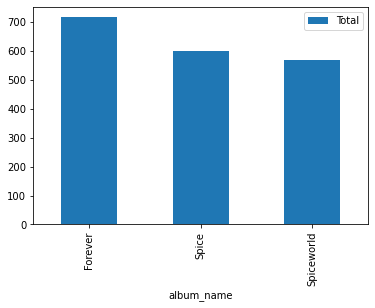

In [212]:
sg.groupby(['album_name']).size().reset_index(name='Total').sort_index(ascending=True).plot(kind='bar',x='album_name')

In [213]:
#list(sg['album_name','song_name'])
sg2 = sg.drop_duplicates(subset=['album_name','song_name'])
sg2.groupby(['album_name','song_name']).size().reset_index(name='Total')


,album_name,song_name,Total
0,Forever,Get Down With Me,1
1,Forever,Goodbye,1
2,Forever,Holler,1
3,Forever,If You Wanna Have Some Fun,1
4,Forever,Let Love Lead the Way,1
5,Forever,Oxygen,1
6,Forever,Right Back At Ya,1
7,Forever,Tell Me Why,1
8,Forever,Time Goes By,1
9,Forever,Wasting My Time,1


Text(0.5, 0, 'Albums')

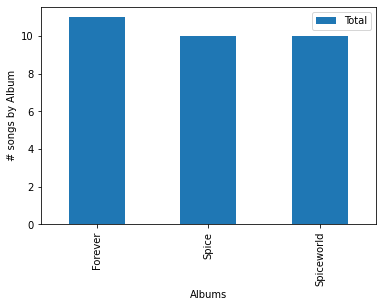

In [214]:
sg3 = sg2.groupby(['album_name','song_name']).size().reset_index(name='Total')
sg3.groupby(['album_name'],as_index=False)['Total'].agg({'Total':'sum'}).plot(kind='bar',x='album_name',y='Total')
plt.ylabel('# songs by Album')
plt.xlabel('Albums')


In [15]:
# Se busca entender el genero o sección como se califica al artista
sg.groupby(['section_artist']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

,section_artist,Total
1,All,331
77,Spice Girls,178
5,All & (Sporty),140
26,Baby,97
63,Scary,65
78,Sporty,56
40,Ginger,54
14,"All, (Sporty)",46
8,All & Sporty,45
38,"Baby, Sporty & Posh",42


In [217]:
sg.drop_duplicates(subset=['album_name','song_name']).groupby(['section_artist']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

,section_artist,Total
14,Spice Girls,4
0,All,3
6,Ginger,3
15,Sporty,3
3,Baby,2
12,Scary & Baby,1
19,"Sporty, Posh & Baby",1
18,"Sporty, All",1
17,Sporty & Baby,1
16,Sporty & All,1


## Feature engineering 

Se busca explorar los temas y categorias que son más frencuentes frente al marco de las canciones de las spice girls, para ello utilizaremos expresiones regulares 


![](https://relopezbriega.github.io/images/regex.png)
**Tomado de : https://relopezbriega.github.io/**


### Expresiones regulares

Son patrones que se encuentran dentro de documentos escritos, o datos, los cuales se pueden modelar a través de una sintaxis especifica.

Supona el siguiente ejemplo :




In [20]:
import re
example_1 = """ El número de telefono de Spiderman es : 123456"""

# Extrayendo Números 
re.findall('[0-9]+',example_1)

['123456']

In [33]:
# Extrayendo palabras
re.findall(r'\w+',example_1)

['El', 'número', 'de', 'telefono', 'de', 'Spiderman', 'es', '123456']

In [42]:
#Extrayendo palabras con mayúsculas
re.findall('([A-Z][a-z]+)', example_1)

['El', 'Spiderman']

Acá encontrará una tabla que será guía para el trabajo que viene a continuación
![](https://regexusingpython.files.wordpress.com/2019/04/0-1.png?crop)


**Tomado de:https://regexusingpython.wordpress.com/2019/04/02/regex-module-lets-begin/**

Si desea mayor información sobre expresiones regulares lo invito a revisar los siguientes links:

* https://towardsdatascience.com/using-regular-expression-in-genetics-with-python-175e2b9395c2
* https://docs.python.org/3/howto/regex.html

In [43]:

import string

pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg['section_artist'] = pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg.head()



,artist_name,album_name,track_number,song_id,song_name,line_number,section_name,line,section_artist
0,Spice Girls,Spice,1,89740,Wannabe,1,Intro,Hahaha,Scary
1,Spice Girls,Spice,1,89740,Wannabe,2,Intro,"Yo, I'll tell you what I want, what I really, ...",Scary
2,Spice Girls,Spice,1,89740,Wannabe,3,Intro,"So tell me what you want, what you really, rea...",Scary
3,Spice Girls,Spice,1,89740,Wannabe,4,Intro,"I'll tell you what I want, what I really, real...",Scary
4,Spice Girls,Spice,1,89740,Wannabe,5,Intro,"So tell me what you want, what you really, rea...",Scary


In [44]:
sg.drop_duplicates(subset=['album_name','song_name']).groupby(['section_artist']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

,section_artist,Total
10,Sporty,6
5,Ginger,5
9,Spice Girls,4
0,All,3
6,Ginger,3
1,All,2
2,Baby,2
11,Sporty,2
3,Baby and Posh,1
4,Baby with Sporty,1


## Topic Modeling 

In [46]:
## Evaluando las canciones
sg.groupby(['line']).size().sort_values(ascending=False)

line
Naked                                                                                                                       22
If you can't dance, if you can't dance                                                                                      22
Get down, get deeper and down                                                                                               20
Saturday night                                                                                                              15
Swing it, shake it, move it, make it, who do you think you are?                                                             12
Don't wanna know about that love thing                                                                                      12
Trust it, use it, prove it, groove it, show me how good you are                                                             11
If you can't dance to this, you can't do nothing for me, baby                                             

In [48]:
## Cleaning Data
sg['line'] = sg['line'].map(lambda x: re.sub("['*|()]", '', x))
sg['line'] = sg['line'].map(lambda x: x.lower())
sg['line']


0                                                  hahaha
1       yo, ill tell you what i want, what i really, r...
2       so tell me what you want, what you really, rea...
3       ill tell you what i want, what i really, reall...
4       so tell me what you want, what you really, rea...
5       i wanna hey!, i wanna hey!, i wanna hey!, i wa...
6       i wanna really, really, really wanna "zig-a-zi...
7                   if you want my future, forget my past
8           if you wanna get with me, better make it fast
9                    now dont go wasting my precious time
10           get your act together, we could be just fine
11      ill tell you what i want, what i really, reall...
12      so tell me what you want, what you really, rea...
13      i wanna hey!, i wanna hey!, i wanna hey!, i wa...
14      i wanna really, really, really wanna "zig-a-zi...
15      if you wanna be my lover, you gotta get with m...
16                              gotta get with my friends
17            

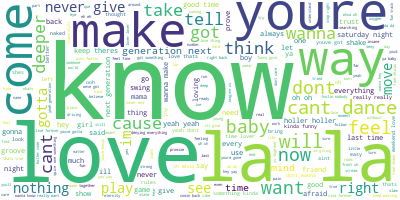

In [49]:
## Explorando las palabras con mayor frecuencia dentro del texto
## Está es una técnica muy usada en el marleting
long_string = ','.join(list(sg['line'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

### Tokenization

La tokenización es una técnica de separar textos de manera tal que puedan ser trabajados para un análisis posterior, en el siguiente ejemplo se descompone una linea de las canciones de las spice girls en palabras

In [57]:
from nltk.tokenize import word_tokenize
word_tokenize(sg['line'][2])

['so',
 'tell',
 'me',
 'what',
 'you',
 'want',
 ',',
 'what',
 'you',
 'really',
 ',',
 'really',
 'want']

(array([2., 0., 2., 0., 2., 0., 5., 0., 0., 2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

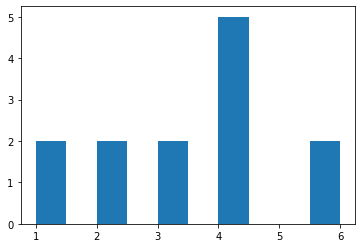

In [58]:
## A continuación se representa gráficamente este proceso
words = word_tokenize(sg['line'][2])  
plt.hist([len(w)for w in words])


In [61]:
## Una forma de ver más organizado lo anterior es :
from collections import Counter
Counter(word_tokenize(sg['line'][3]))


Counter({'ill': 1,
         'tell': 1,
         'you': 1,
         'what': 2,
         'i': 2,
         'want': 2,
         ',': 2,
         'really': 2})

In [64]:
### Limpiando un poco la data

tokens = [w for w in word_tokenize(sg['line'][3].lower()) if w.isalpha()]
tokens


['ill',
 'tell',
 'you',
 'what',
 'i',
 'want',
 'what',
 'i',
 'really',
 'really',
 'want']

In [68]:
no_stop = [x for x in tokens if x not in stopwords.words('english')]
no_stop

['ill', 'tell', 'want', 'really', 'really', 'want']

In [78]:
Counter(no_stop)

Counter({'ill': 1, 'tell': 1, 'want': 2, 'really': 2})

In [79]:
## Ejemplo con todos los documentos 
sg['dirty_token']=sg.apply(lambda row: nltk.word_tokenize(row['line']), axis=1)
sg.head()

,artist_name,album_name,track_number,song_id,song_name,line_number,section_name,line,section_artist,dirty_token
0,Spice Girls,Spice,1,89740,Wannabe,1,Intro,hahaha,Scary,[hahaha]
1,Spice Girls,Spice,1,89740,Wannabe,2,Intro,"yo, ill tell you what i want, what i really, r...",Scary,"[yo, ,, ill, tell, you, what, i, want, ,, what..."
2,Spice Girls,Spice,1,89740,Wannabe,3,Intro,"so tell me what you want, what you really, rea...",Scary,"[so, tell, me, what, you, want, ,, what, you, ..."
3,Spice Girls,Spice,1,89740,Wannabe,4,Intro,"ill tell you what i want, what i really, reall...",Scary,"[ill, tell, you, what, i, want, ,, what, i, re..."
4,Spice Girls,Spice,1,89740,Wannabe,5,Intro,"so tell me what you want, what you really, rea...",Scary,"[so, tell, me, what, you, want, ,, what, you, ..."


In [147]:
#sg['dirty_token'][1]
def clean_token (text):
    token = [w for w  in text if w.isalpha()]
    return token 

In [150]:
sg['clean_token'] = sg.apply(lambda row: clean_token(row['dirty_token']), axis=1)
sg.head()

,artist_name,album_name,track_number,song_id,song_name,line_number,section_name,line,section_artist,dirty_token,clean_token
0,Spice Girls,Spice,1,89740,Wannabe,1,Intro,hahaha,Scary,[hahaha],[hahaha]
1,Spice Girls,Spice,1,89740,Wannabe,2,Intro,"yo, ill tell you what i want, what i really, r...",Scary,"[yo, ,, ill, tell, you, what, i, want, ,, what...","[yo, ill, tell, you, what, i, want, what, i, r..."
2,Spice Girls,Spice,1,89740,Wannabe,3,Intro,"so tell me what you want, what you really, rea...",Scary,"[so, tell, me, what, you, want, ,, what, you, ...","[so, tell, me, what, you, want, what, you, rea..."
3,Spice Girls,Spice,1,89740,Wannabe,4,Intro,"ill tell you what i want, what i really, reall...",Scary,"[ill, tell, you, what, i, want, ,, what, i, re...","[ill, tell, you, what, i, want, what, i, reall..."
4,Spice Girls,Spice,1,89740,Wannabe,5,Intro,"so tell me what you want, what you really, rea...",Scary,"[so, tell, me, what, you, want, ,, what, you, ...","[so, tell, me, what, you, want, what, you, rea..."


In [153]:
## Removiendo stopwords 

def remove_stop_words(text):
    no_stop = [x for x in text if x not in stopwords.words('english')]
    return no_stop

In [155]:
sg['final_tokens'] = sg.apply(lambda row: remove_stop_words(row['clean_token']), axis=1)
sg.head()

,artist_name,album_name,track_number,song_id,song_name,line_number,section_name,line,section_artist,dirty_token,clean_token,final_tokens
0,Spice Girls,Spice,1,89740,Wannabe,1,Intro,hahaha,Scary,[hahaha],[hahaha],[hahaha]
1,Spice Girls,Spice,1,89740,Wannabe,2,Intro,"yo, ill tell you what i want, what i really, r...",Scary,"[yo, ,, ill, tell, you, what, i, want, ,, what...","[yo, ill, tell, you, what, i, want, what, i, r...","[yo, ill, tell, want, really, really, want]"
2,Spice Girls,Spice,1,89740,Wannabe,3,Intro,"so tell me what you want, what you really, rea...",Scary,"[so, tell, me, what, you, want, ,, what, you, ...","[so, tell, me, what, you, want, what, you, rea...","[tell, want, really, really, want]"
3,Spice Girls,Spice,1,89740,Wannabe,4,Intro,"ill tell you what i want, what i really, reall...",Scary,"[ill, tell, you, what, i, want, ,, what, i, re...","[ill, tell, you, what, i, want, what, i, reall...","[ill, tell, want, really, really, want]"
4,Spice Girls,Spice,1,89740,Wannabe,5,Intro,"so tell me what you want, what you really, rea...",Scary,"[so, tell, me, what, you, want, ,, what, you, ...","[so, tell, me, what, you, want, what, you, rea...","[tell, want, really, really, want]"


In [160]:
Counter(sg['final_tokens'][1])

Counter({'yo': 1, 'ill': 1, 'tell': 1, 'want': 2, 'really': 2})

In [164]:
#
all_text = word_tokenize(long_string)
all_text_clean = clean_token(all_text)
all_text_clean_and_filter_stop_words = remove_stop_words(all_text_clean)


In [179]:
words_tokens = pd.DataFrame(all_text_clean_and_filter_stop_words,columns=['Words_tokens']).groupby('Words_tokens').size().reset_index(name='Total').sort_values(ascending=False, by='Total')
words_tokens.nlargest(10,'Total')

,Words_tokens,Total
310,get,153
333,got,146
476,love,137
532,na,132
425,know,124
849,time,105
922,wan,102
544,never,101
97,cant,97
984,youre,93


<AxesSubplot:xlabel='Words_tokens'>

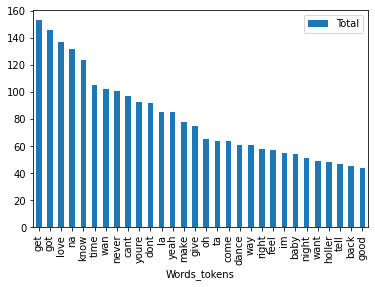

In [183]:

words_tokens.nlargest(30,'Total').plot(kind='bar',x='Words_tokens',y='Total')

## Topic Modeling 

In [191]:
from gensim import corpora, models
%matplotlib inline  
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LsiModel
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim import matutils
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import defaultdict
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import pandas as pd
import numpy as np
import pickle
import lda

In [193]:
frequency = defaultdict(int)
for text in sg['final_tokens']:
    for token in text:
        frequency[token] += 1

In [194]:
texts = [[token for token in text if frequency[token] > 10] for text in sg['final_tokens']]

In [196]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [197]:
speeches_topics = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=20,
                           passes=10)

In [202]:
for i, topic in enumerate(speeches_topics.print_topics(10)):
    print(i,topic)

0 (1, '0.196*"yeah" + 0.167*"got" + 0.072*"naked" + 0.059*"youve" + 0.054*"right" + 0.046*"something" + 0.045*"kinda" + 0.042*"funny" + 0.040*"goin" + 0.038*"ya"')
1 (16, '0.131*"make" + 0.089*"ill" + 0.088*"think" + 0.069*"move" + 0.067*"forever" + 0.060*"shake" + 0.050*"afraid" + 0.045*"im" + 0.045*"swing" + 0.045*"everything"')
2 (18, '0.300*"youre" + 0.093*"say" + 0.071*"everything" + 0.051*"denying" + 0.044*"insane" + 0.044*"driving" + 0.043*"gone" + 0.042*"feeling" + 0.041*"one" + 0.040*"ever"')
3 (17, '0.342*"come" + 0.259*"holler" + 0.091*"let" + 0.065*"wink" + 0.065*"nudge" + 0.032*"thing" + 0.018*"ya" + 0.016*"see" + 0.015*"tell" + 0.012*"everything"')
4 (10, '0.181*"go" + 0.175*"im" + 0.072*"life" + 0.070*"spice" + 0.070*"world" + 0.063*"friend" + 0.059*"ive" + 0.058*"know" + 0.054*"games" + 0.034*"give"')
5 (19, '0.116*"dont" + 0.103*"aint" + 0.097*"much" + 0.067*"around" + 0.065*"stop" + 0.049*"foolin" + 0.049*"nobody" + 0.047*"look" + 0.045*"made" + 0.041*"slam"')
6 (6, '

In [203]:
vis_data = gensimvis.prepare(speeches_topics, corpus, dictionary)
pyLDAvis.display(vis_data)

In [205]:
dictionary.token2id

{'ill': 0,
 'really': 1,
 'tell': 2,
 'want': 3,
 'hey': 4,
 'na': 5,
 'wan': 6,
 'ah': 7,
 'better': 8,
 'get': 9,
 'make': 10,
 'dont': 11,
 'go': 12,
 'time': 13,
 'wasting': 14,
 'could': 15,
 'fine': 16,
 'together': 17,
 'got': 18,
 'lover': 19,
 'ta': 20,
 'forever': 21,
 'last': 22,
 'never': 23,
 'give': 24,
 'easy': 25,
 'thats': 26,
 'way': 27,
 'feel': 28,
 'know': 29,
 'oh': 30,
 'think': 31,
 'love': 32,
 'real': 33,
 'say': 34,
 'try': 35,
 'youve': 36,
 'face': 37,
 'like': 38,
 'come': 39,
 'free': 40,
 'shes': 41,
 'see': 42,
 'around': 43,
 'slam': 44,
 'uh': 45,
 'everything': 46,
 'giving': 47,
 'im': 48,
 'joy': 49,
 'swear': 50,
 'going': 51,
 'end': 52,
 'ever': 53,
 'thought': 54,
 'would': 55,
 'take': 56,
 'much': 57,
 'fool': 58,
 'cant': 59,
 'show': 60,
 'need': 61,
 'left': 62,
 'yes': 63,
 'yeah': 64,
 'always': 65,
 'believe': 66,
 'mind': 67,
 'baby': 68,
 'little': 69,
 'cause': 70,
 'night': 71,
 'one': 72,
 'ya': 73,
 'back': 74,
 'games': 75,
 'boy

In [207]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[:2]

[[], [(0, 1), (1, 2), (2, 1), (3, 2)]]

## Tf-idf

Esta técnica consiste en entender ¿en qué consiste un texto?, a través de lqa frecuencia de las palabras (tf), pero se le agrega el enfoque probabilistico donde se busca eliminar las palabras vacias, con el orden inverso a la frecuencia (idf), quitandole peso a las palabras más comunes

Matématicamente sería así

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/cc5cc57e5b68902a0bfaf42f04e53458503601c4)

In [230]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf[corpus[2]]

[(1, 0.7054936023039992), (2, 0.30123418775708766), (3, 0.6415112947052877)]

In [242]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [244]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.143*"cant" + 0.105*"dance" + 0.042*"every" + 0.033*"boy" + 0.030*"baby" + 0.026*"nothing" + 0.025*"forever" + 0.025*"insane" + 0.024*"driving" + 0.024*"oh"
Topic: 1 
Words: 0.072*"holler" + 0.064*"love" + 0.057*"na" + 0.055*"way" + 0.054*"come" + 0.052*"wan" + 0.038*"loving" + 0.036*"like" + 0.035*"youre" + 0.028*"go"
Topic: 2 
Words: 0.086*"love" + 0.084*"thats" + 0.052*"hey" + 0.048*"mama" + 0.047*"true" + 0.044*"friend" + 0.042*"oh" + 0.042*"youre" + 0.038*"move" + 0.035*"yeah"
Topic: 3 
Words: 0.088*"give" + 0.070*"never" + 0.063*"want" + 0.052*"time" + 0.044*"good" + 0.041*"know" + 0.041*"lover" + 0.040*"im" + 0.035*"ill" + 0.027*"love"
Topic: 4 
Words: 0.172*"get" + 0.068*"yeah" + 0.059*"know" + 0.045*"deeper" + 0.042*"na" + 0.041*"wan" + 0.038*"night" + 0.034*"right" + 0.033*"got" + 0.033*"dont"
Topic: 5 
Words: 0.079*"get" + 0.074*"na" + 0.061*"wan" + 0.048*"dont" + 0.047*"play" + 0.042*"game" + 0.042*"love" + 0.032*"make" + 0.028*"weekend" + 0.027*"baby"
Top

In [246]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.063*"youre" + 0.060*"time" + 0.055*"every" + 0.044*"could" + 0.030*"mind" + 0.029*"left" + 0.028*"good" + 0.027*"together" + 0.026*"keep" + 0.026*"still"
Topic: 1 Word: 0.080*"yeah" + 0.075*"never" + 0.063*"way" + 0.059*"cant" + 0.052*"generation" + 0.047*"next" + 0.046*"give" + 0.034*"dance" + 0.031*"play" + 0.021*"game"
Topic: 2 Word: 0.061*"night" + 0.058*"got" + 0.055*"want" + 0.046*"saturday" + 0.044*"aint" + 0.041*"trust" + 0.040*"prove" + 0.040*"groove" + 0.038*"da" + 0.036*"use"
Topic: 3 Word: 0.088*"na" + 0.075*"wan" + 0.069*"get" + 0.062*"know" + 0.055*"got" + 0.030*"dont" + 0.029*"uh" + 0.027*"see" + 0.024*"need" + 0.023*"love"
Topic: 4 Word: 0.105*"get" + 0.056*"cant" + 0.049*"deeper" + 0.044*"dance" + 0.042*"never" + 0.039*"know" + 0.037*"back" + 0.036*"right" + 0.036*"forever" + 0.031*"last"
Topic: 5 Word: 0.061*"got" + 0.052*"everything" + 0.045*"im" + 0.041*"youre" + 0.041*"ta" + 0.040*"give" + 0.040*"dont" + 0.037*"tell" + 0.033*"say" + 0.027*"think"
T

In [248]:
for index, score in sorted(lda_model[corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8499880433082581	 
Topic: 0.088*"give" + 0.070*"never" + 0.063*"want" + 0.052*"time" + 0.044*"good" + 0.041*"know" + 0.041*"lover" + 0.040*"im" + 0.035*"ill" + 0.027*"love"

Score: 0.016672208905220032	 
Topic: 0.104*"got" + 0.059*"youre" + 0.045*"oh" + 0.041*"youve" + 0.035*"tell" + 0.032*"something" + 0.028*"im" + 0.028*"kinda" + 0.027*"funny" + 0.025*"make"

Score: 0.016669023782014847	 
Topic: 0.085*"got" + 0.072*"time" + 0.061*"ta" + 0.053*"na" + 0.036*"never" + 0.035*"baby" + 0.034*"gon" + 0.030*"much" + 0.021*"wan" + 0.021*"wink"

Score: 0.016668103635311127	 
Topic: 0.072*"holler" + 0.064*"love" + 0.057*"na" + 0.055*"way" + 0.054*"come" + 0.052*"wan" + 0.038*"loving" + 0.036*"like" + 0.035*"youre" + 0.028*"go"

Score: 0.01666799746453762	 
Topic: 0.129*"la" + 0.062*"feel" + 0.057*"keep" + 0.052*"shake" + 0.040*"know" + 0.036*"make" + 0.029*"move" + 0.028*"swing" + 0.027*"theres" + 0.027*"dont"

Score: 0.016667095944285393	 
Topic: 0.172*"get" + 0.068*"yeah" + 0.059*"k

In [257]:
## Performando
for index, score in sorted(lda_model_tfidf[corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8499822616577148	 
Topic: 0.052*"right" + 0.050*"much" + 0.048*"baby" + 0.044*"time" + 0.032*"na" + 0.031*"play" + 0.030*"got" + 0.029*"want" + 0.028*"gon" + 0.025*"game"

Score: 0.016672734171152115	 
Topic: 0.061*"night" + 0.058*"got" + 0.055*"want" + 0.046*"saturday" + 0.044*"aint" + 0.041*"trust" + 0.040*"prove" + 0.040*"groove" + 0.038*"da" + 0.036*"use"

Score: 0.016671761870384216	 
Topic: 0.061*"got" + 0.052*"everything" + 0.045*"im" + 0.041*"youre" + 0.041*"ta" + 0.040*"give" + 0.040*"dont" + 0.037*"tell" + 0.033*"say" + 0.027*"think"

Score: 0.016669530421495438	 
Topic: 0.163*"la" + 0.066*"hey" + 0.064*"na" + 0.061*"wan" + 0.059*"know" + 0.042*"youre" + 0.033*"time" + 0.023*"always" + 0.022*"made" + 0.022*"really"

Score: 0.016667889431118965	 
Topic: 0.063*"youre" + 0.060*"time" + 0.055*"every" + 0.044*"could" + 0.030*"mind" + 0.029*"left" + 0.028*"good" + 0.027*"together" + 0.026*"keep" + 0.026*"still"

Score: 0.0166675616055727	 
Topic: 0.080*"yeah" + 0.075*"nev

In [259]:
for index, score in sorted(lda_model[corpus[2]], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8499884009361267	 Topic: 0.088*"give" + 0.070*"never" + 0.063*"want" + 0.052*"time" + 0.044*"good"
Score: 0.016671808436512947	 Topic: 0.104*"got" + 0.059*"youre" + 0.045*"oh" + 0.041*"youve" + 0.035*"tell"
Score: 0.016669021919369698	 Topic: 0.085*"got" + 0.072*"time" + 0.061*"ta" + 0.053*"na" + 0.036*"never"
Score: 0.016668101772665977	 Topic: 0.072*"holler" + 0.064*"love" + 0.057*"na" + 0.055*"way" + 0.054*"come"
Score: 0.01666799560189247	 Topic: 0.129*"la" + 0.062*"feel" + 0.057*"keep" + 0.052*"shake" + 0.040*"know"
Score: 0.016667094081640244	 Topic: 0.172*"get" + 0.068*"yeah" + 0.059*"know" + 0.045*"deeper" + 0.042*"na"
Score: 0.01666698232293129	 Topic: 0.059*"next" + 0.053*"generation" + 0.046*"come" + 0.045*"cause" + 0.044*"take"
Score: 0.01666695438325405	 Topic: 0.079*"get" + 0.074*"na" + 0.061*"wan" + 0.048*"dont" + 0.047*"play"
Score: 0.01666681282222271	 Topic: 0.143*"cant" + 0.105*"dance" + 0.042*"every" + 0.033*"boy" + 0.030*"baby"
Score: 0.01666676625609398	 

In [297]:
## Encontrando el número óptimo de topics
document_topic = {}
for doc_id in range(len(corpus)):
    docbok = corpus[doc_id]
    doc_topics = speeches_topics.get_document_topics(docbok, 0)
    tmp = []
    for topic_id, topic_prob in doc_topics:
        tmp.append(topic_prob)
    document_topic[sg['song_name'][doc_id]] = tmp



In [298]:
df = pd.DataFrame.from_dict(document_topic, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Wannabe,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.262499,0.512500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500
Say You’ll Be There,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.524999,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
2 Become 1,0.525000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
Love Thing,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.632842,0.007143,0.007143,0.007143,0.238586,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143
Last Time Lover,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.810000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000


In [299]:
sg_speech = [x.split('|')[0] for x in df.index]
sg_speech 


['Wannabe',
 'Say You’ll Be There',
 '2 Become 1',
 'Love Thing',
 'Last Time Lover',
 'Mama',
 'Who Do You Think You Are',
 'Something Kinda Funny',
 'Naked',
 'If U Can’t Dance',
 'Spice Up Your Life',
 'Stop',
 'Too Much',
 'Saturday Night Divas',
 'Never Give Up on the Good Times',
 'Move Over',
 'Do It',
 'Denying',
 'Viva Forever',
 'The Lady Is a Vamp',
 'Holler',
 'Tell Me Why',
 'Let Love Lead the Way',
 'Right Back At Ya',
 'Get Down With Me',
 'Wasting My Time',
 'Weekend Love',
 'Time Goes By',
 'If You Wanna Have Some Fun',
 'Oxygen',
 'Goodbye']

In [300]:
topics_speech = df
topics_speech['song'] = pd.Series(sg_speech, index=df.index)
topic_column_names = ['topic_' + str(i) for i in range(0, 20)]
topic_column_names.append('song')
topics_speech.columns = topic_column_names
print(topics_speech.head(5))


                      topic_0   topic_1   topic_2   topic_3   topic_4  \
Wannabe              0.012500  0.012500  0.012500  0.012500  0.012500   
Say You’ll Be There  0.025000  0.025000  0.025000  0.025000  0.025000   
2 Become 1           0.525000  0.025000  0.025000  0.025000  0.025000   
Love Thing           0.007143  0.007143  0.007143  0.007143  0.007143   
Last Time Lover      0.010000  0.010000  0.010000  0.010000  0.010000   

                      topic_5   topic_6   topic_7   topic_8   topic_9  ...  \
Wannabe              0.012500  0.012500  0.012500  0.012500  0.012500  ...   
Say You’ll Be There  0.025000  0.524999  0.025000  0.025000  0.025000  ...   
2 Become 1           0.025000  0.025000  0.025000  0.025000  0.025000  ...   
Love Thing           0.007143  0.007143  0.007143  0.007143  0.632842  ...   
Last Time Lover      0.010000  0.010000  0.010000  0.010000  0.010000  ...   

                     topic_11  topic_12  topic_13  topic_14  topic_15  \
Wannabe            

In [301]:
columns = ['topic_'+str(i) for i in range(0, 20)]
df = pd.DataFrame(topics_speech.groupby('song')[columns].sum())
df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
song,,,,,,,,,,,,,,,,,,,,
2 Become 1,0.525000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
Denying,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.683333,0.016667
Do It,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.339431,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.510568,0.008333,0.008333,0.008333
Get Down With Me,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.683333,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667
Goodbye,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.349999,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.349999,0.016667


In [307]:
df = 100 * df.div(df.sum(axis=1), axis=0) 
df = np.round(df, 1) 
df[df.index=='Wannabe']

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
song,,,,,,,,,,,,,,,,,,,,
Wannabe,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,25.9,50.7,1.3,1.3,1.3,1.3,1.3,1.3


In [312]:
from sklearn import manifold
from time import time
t0 = time()
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
Y = tsne.fit_transform(df)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

t-SNE: 0.57 sec


In [313]:
sg_clusters = pd.DataFrame(Y)
sg_clusters = sg_clusters.set_index(df.index)
sg_clusters.head(5)

,0,1,2
song,,,
2 Become 1,-88.241051,127.526009,-79.128166
Denying,17.160553,-92.012672,-14.352401
Do It,10.871224,-174.888733,-329.160278
Get Down With Me,87.300652,89.077835,113.725899
Goodbye,96.131248,300.949341,-549.607849


In [317]:
import colorsys
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [322]:
sg.columns

Index(['artist_name', 'album_name', 'track_number', 'song_id', 'song_name',
       'line_number', 'section_name', 'line', 'section_artist', 'dirty_token',
       'clean_token', 'final_tokens'],
      dtype='object')

In [330]:
songs = sg['line'].tolist()
albums = sg['album_name'].tolist()

In [353]:
songs_words = defaultdict(list)
for i, song in enumerate(songs):
    songs_words[song].append(albums[i])

In [386]:
sg_clusters = pd.DataFrame(Y)
sg_clusters['lyric'] =pd.Series([str(x) for x in songs_words.keys()], index=sg['song_name'][1:1098].index)
sg_clusters
#songs_clusters['lyric'] =pd.Series([str(x) for x in songs_words.keys()], index=sg['song_name'][1:1098])
#songs_clusters = songs_clusters.reset_index()
#songs_clusters


,0,1,2,lyric
0,-88.241051,127.526009,-79.128166,NaN
1,17.160553,-92.012672,-14.352401,hahaha
2,10.871224,-174.888733,-329.160278,"yo, ill tell you what i want, what i really, r..."
3,87.300652,89.077835,113.725899,"so tell me what you want, what you really, rea..."
4,96.131248,300.949341,-549.607849,"ill tell you what i want, what i really, reall..."
5,272.011169,1.803569,87.336914,"i wanna hey!, i wanna hey!, i wanna hey!, i wa..."
6,-43.766701,288.661346,-230.696426,"i wanna really, really, really wanna ""zig-a-zi..."
7,-108.247833,-89.051437,-205.022888,"if you want my future, forget my past"
8,133.163406,97.250565,-83.227242,"if you wanna get with me, better make it fast"
9,-2.387990,87.184418,-291.425110,now dont go wasting my precious time


In [403]:
albums = [x for x in sg_clusters['lyric']]
unique_albums = list(set(albums))
N = len(unique_albums)
HSV_tuples = [(x*1.0/N, 0.5, 0.9) for x in range(N)]
RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
#list(map(int,payList))

In [404]:
album_colors = {}
for i, p in enumerate(unique_albums):
    album_colors[p] = RGB_tuples[i]

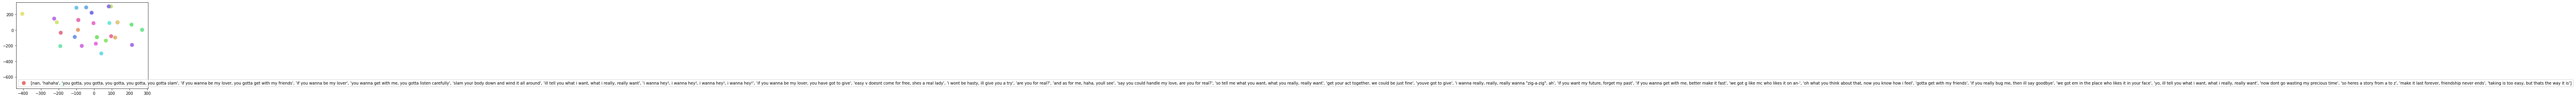

In [447]:

plt.scatter(sg_clusters.iloc[:, 0],
            sg_clusters.iloc[:, 1], 
            s=80,
            label=unique_albums,
            c=[album_colors[p] for p in albums])

plt.legend()

## Reconocimiento de entidades



In [453]:
example_2 = """Los jovenes de la JEP eran como 21, evacuaron 9, y por lo tanto se le notifico a la Nacional de esta 
eventualidad, en especial por qué nunca deje de preguntar si : Karem está?"""
token_sentence = nltk.word_tokenize(example_2)
tageo = nltk.pos_tag(token_sentence)
tageo[:5]

[('Los', 'NNP'),
 ('jovenes', 'NNS'),
 ('de', 'FW'),
 ('la', 'FW'),
 ('JEP', 'NNP')]

In [463]:
import spacy

In [484]:
nlp = spacy.load("en_core_web_sm")


In [485]:
doc = nlp("""Cut up, Maria
Show me some of them Spanish dances
Pass me a bottle, Mr. Jones
Believe in me
Help me believe in anything
'Cause I wanna be someone who believes
Yeah
""")

In [486]:
doc.ents

(Maria
 Show,
 Spanish,
 Jones)